In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Yelp business data
yelp_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fl_business_copy2.csv")

<ipython-input-4-b66807d5ea41>:2: DtypeWarning: Columns (12,45,46,47,48,49,50,51,52,83) have mixed types. Specify dtype option on import or set low_memory=False.
  yelp_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fl_business_copy2.csv")


In [ ]:
# Display first few rows
yelp_data.head()

business_id                                         categories  \
0  oaepsyvc0J17qwi8cfrOWg                         Beauty & Spas, Hair Salons   
1  SFqFFIA4Ks2oHfgEANoRlw  Tapas Bars, Restaurants, American (New), Food,...   
2  2PxZ-fICnd432NJHefXrcA                          Hotels & Travel, Airports   
3  SrsebLQ5lVehQXJp8OcBUg  Asian Fusion, American (New), Restaurants, Sus...   
4  MUeUyqhMja-nnmvgP4rBBg  Hotels, Vacation Rentals, Hotels & Travel, Eve...   

          city                                            address  is_open  \
0  Orange City                                 2566 Enterprise Rd        1   
1      Orlando                              8625 International Dr        1   
2      Orlando                                  1 Jeff Fuqua Blvd        1   
3      Orlando  Universal Citywalk - Orlando, 6000 Universal Blvd        1   
4    Kissimmee                            4787 W Irlo Bronson Hwy        0   

    latitude  longitude                                 name  postal_code  \
0  28.914482 -81.295979                          Great Clips      32763.0   
1  28.440381 -81.469822                     Café Tu Tu Tango      32819.0   
2  28.427839 -81.308183  Orlando International Airport - MCO      32827.0   
3  28.473028 -81.465348         The Cowfish Sushi Burger Bar      32819.0   
4  28.330255 -81.469464               Saratoga Resort Villas      34746.0   

   review_count  ...  hours_Saturday hours_Sunday hours_Thursday  \
0             8  ...             NaN          NaN            NaN   
1          3236  ...        10:0-0:0    10:0-22:0      12:0-23:0   
2          2630  ...         0:0-0:0      0:0-0:0        0:0-0:0   
3          2407  ...        11:0-0:0    11:0-22:0      16:0-22:0   
4            55  ...         0:0-0:0      0:0-0:0        0:0-0:0   

  hours_Tuesday hours_Wednesday state AcceptCreditCards  \
0           NaN             NaN    FL                 1   
1     12:0-23:0       12:0-23:0    FL                 1   
2       0:0-0:0         0:0-0:0    FL                 1   
3     16:0-22:0       16:0-22:0    FL                 1   
4       0:0-0:0         0:0-0:0    FL                 1   

  attributes_RestaurantsDelivery_None  \
0                                True   
1                               False   
2                                True   
3                                True   
4                                True   

  attributes_RestaurantsDelivery_True_True NoiseLevel  
0                                    False        2.0  
1                                     True        NaN  
2                                    False        2.0  
3                                    False        NaN  
4                                    False        2.0  

[5 rows x 106 columns]

In [ ]:

# Step 2: Selecting Features
X = yelp_data[['review_count', 'stars', 'latitude']]
y = yelp_data['is_open']

In [ ]:
#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:

#  Model Development and Prediction
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [ ]:
#  Model Evaluation
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

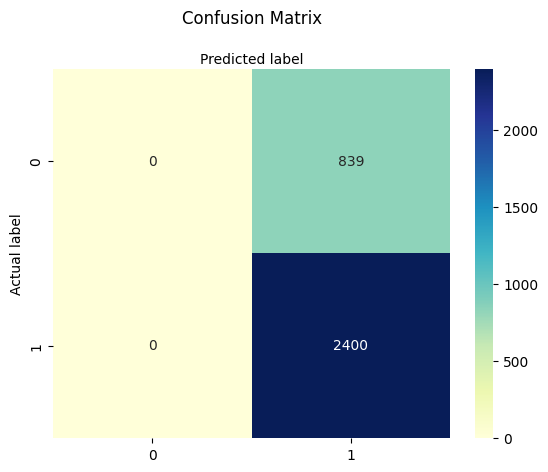

In [ ]:
# Visualizing Confusion Matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
# Step 6: Evaluation Metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, pos_label=1)
recall = metrics.recall_score(y_test, y_pred, pos_label=1)
f1_score = metrics.f1_score(y_test, y_pred, pos_label=1)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.7409694350108058
Precision: 0.7409694350108058
Recall: 1.0
F1 Score: 0.8512147543890761


I think this is staifacotry but maybe could be better with more varibles


In [ ]:
# Step 7: changing the Model
# Trying different feature combinations
X_alt = yelp_data[[ 'latitude', "AcceptCreditCards"]]
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y, test_size=0.40, random_state=0)

log_model_alt = LogisticRegression(max_iter=1000)
log_model_alt.fit(X_train_alt, y_train_alt)
y_pred_alt = log_model_alt.predict(X_test_alt)

# Alternative model evaluation
accuracy_alt = metrics.accuracy_score(y_test_alt, y_pred_alt)
precision_alt = metrics.precision_score(y_test_alt, y_pred_alt, pos_label=1)
recall_alt = metrics.recall_score(y_test_alt, y_pred_alt, pos_label=1)
f1_score_alt = metrics.f1_score(y_test_alt, y_pred_alt, pos_label=1)

print("\nAlternative Model")
print("Accuracy:", accuracy_alt)
print("Precision:", precision_alt)
print("Recall:", recall_alt)
print("F1 Score:", f1_score_alt)


Alternative Model
Accuracy: 0.7454650714010035
Precision: 0.7454650714010035
Recall: 1.0
F1 Score: 0.8541735765616363


If i change the variables and test size the numbers stay the same I think its because the number of businesses are finite
